In [3]:
import os
from pathlib import Path

import geopandas as gpd
import rasterio
from rasterio import features

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [5]:
def read_img(path_to_img):
    with rasterio.open(path_to_img, "r") as img:
        return img.read(1).astype(np.float32)

In [7]:
# vector data from last session
gt = gpd.read_file("D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\ground_truth_vector\ground_truth.gpkg")

# satellite data from last session
base = Path("D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img")

C:\Users\ronny\.conda\envs\rs\lib\site-packages\geopandas\geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [10]:
gt

,class,class_id,uuid,geometry
0,rock_debris,0,0,"POLYGON ((659758.988 5211279.785, 659360.151 5..."
1,rock_debris,0,1,"POLYGON ((661859.413 5210692.756, 661855.003 5..."
2,rock_debris,0,2,"POLYGON ((662028.964 5211059.152, 662084.122 5..."
3,rock_debris,0,3,"POLYGON ((662099.907 5210904.814, 662098.019 5..."
4,rock_debris,0,4,"POLYGON ((663226.267 5210963.338, 663240.054 5..."
...,...,...,...,...
142,ice_snow,3,142,"POLYGON ((636712.437 5193481.859, 636598.835 5..."
143,ice_snow,3,143,"POLYGON ((662169.814 5204849.069, 661932.124 5..."
144,ice_snow,3,144,"POLYGON ((664880.537 5204863.051, 664807.133 5..."
145,ice_snow,3,145,"POLYGON ((702683.851 5216366.583, 702295.855 5..."


In [16]:
np.unique(gt["class"], return_counts = True)

(array(['forest', 'grassland', 'ice_snow', 'rock_debris'], dtype=object),
 array([35, 26, 36, 50], dtype=int64))

In [39]:
#idxs = list(gt.index)
idxs = np.arange(len(gt))

In [40]:
idx_train, idx_test = train_test_split(idxs, random_state = 12, test_size = 0.3, stratify = gt["class_id"])

In [31]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to t

In [41]:
print(idx_train.shape)
print(idx_test.shape)

(102,)
(45,)


In [44]:
polygon_train = gt.iloc[idx_train,:]
polygon_test = gt.iloc[idx_test,:]

In [45]:
polygon_train

,class,class_id,uuid,geometry
140,ice_snow,3,140,"POLYGON ((637851.038 5193888.205, 637894.774 5..."
122,ice_snow,3,122,"POLYGON ((661662.606 5210459.577, 661586.406 5..."
57,forest,1,57,"POLYGON ((662224.980 5224793.934, 662330.814 5..."
124,ice_snow,3,124,"POLYGON ((660572.673 5214996.629, 660409.903 5..."
41,rock_debris,0,41,"POLYGON ((659965.003 5214641.214, 659982.802 5..."
...,...,...,...,...
20,rock_debris,0,20,"POLYGON ((655351.826 5224530.461, 655288.579 5..."
9,rock_debris,0,9,"POLYGON ((666185.720 5211784.965, 666189.723 5..."
114,ice_snow,3,114,"POLYGON ((657169.170 5215294.216, 657181.336 5..."
83,forest,1,83,"POLYGON ((661748.531 5219951.302, 661748.136 5..."


In [46]:
base

WindowsPath('D:/_Programmieren/VU_Automatisierung_Daten/Daten/session7/data/s2_img')

In [50]:
for band in base.glob("*.tif"):
    print(band)

D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img\T32TPT_20200913T101629_B02_10m.tif
D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img\T32TPT_20200913T101629_B03_10m.tif
D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img\T32TPT_20200913T101629_B04_10m.tif
D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img\T32TPT_20200913T101629_B05_20m.tif
D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img\T32TPT_20200913T101629_B06_20m.tif
D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img\T32TPT_20200913T101629_B07_20m.tif
D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img\T32TPT_20200913T101629_B08_10m.tif
D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img\T32TPT_20200913T101629_B11_20m.tif
D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img\T32TPT_20200913T101629_B12_20m.tif
D:\_Programmieren\VU_Automatisierung_Daten\Daten\sessio

In [51]:
dummy_band = "D:\_Programmieren\VU_Automatisierung_Daten\Daten\session7\data\s2_img\T32TPT_20200913T101629_B02_10m.tif"
template = {}
with rasterio.open(dummy_band, "r") as img:
    template["transform"] = img.transform
    template["crs"] = img.crs
    template["height"] = img.height
    template["width"] = img.width
    

In [52]:
template

{'transform': Affine(10.0, 0.0, 654000.0,
        0.0, -10.0, 5227400.0),
 'crs': CRS.from_epsg(32632),
 'height': 2726,
 'width': 1876}

In [57]:
shapes_test = ((geom,value) for geom, value in  zip(polygon_test.geometry, polygon_test.class_id))
label_test = features.rasterize(shapes = shapes_test, 
                  out_shape = (template["height"],template["width"]), 
                   transform = template["transform"],
                   fill = -1,
                   all_touched = False,
                   dtype = np.float32)

In [59]:
label_test.shape #reihen, spalten

(2726, 1876)

In [61]:
shapes_train = ((geom,value) for geom, value in  zip(polygon_train.geometry, polygon_train.class_id))
label_train = features.rasterize(shapes = shapes_train, 
                  out_shape = (template["height"],template["width"]), 
                   transform = template["transform"],
                   fill = -1,
                   all_touched = False,
                   dtype = np.float32)

In [63]:
label_train.shape

(2726, 1876)

In [68]:
bands = []
for band in base.glob("*.tif"):
    band_id = band.stem.split("_")[2]
    if not band_id in ["SCL","TCI"]:
        #print(band)
        bands.append(read_img(band))

In [81]:
bands = np.dstack(bands)
print(bands.shape)

(2726, 1876, 10)


In [90]:
X_train = bands[label_train >= 0,:]
y_train = label_train[label_train>=0]

X_test = bands[label_test >= 0,:]
y_test = label_test[label_test>=0]

In [91]:
print(X_test.shape)
print(y_test.shape)

(82449, 10)
(82449,)


In [93]:
rf = RF (n_estimators = 20, n_jobs = -1, oob_score = True, random_state = 12)

In [95]:

rf.fit(X_train, y_train)
rows, cols, n_bands = bands.shape
X_pred = bands.reshape((rows*cols,n_bands))
y_pred = rf.predict(X_pred)
y_pred_2d = y_pred.reshape((rows,cols))

with rasterio.open(
    "prediction.tif",
    "w",
    driver = "GTiff",
    height = rows,
    width = cols,
    count = 1,
    dtype = y_pred_2d.dtype,
    crs=template["crs"],
    transform = template["transform"]) as fobj:
    fobj.write(y_pred_2d, 1)

C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [99]:
y_pred_test = rf.predict(X_test)

In [101]:
y_pred_test

array([2., 2., 2., ..., 3., 3., 3.], dtype=float32)

In [103]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [106]:
cnf_mat = confusion_matrix(y_test, y_pred_test)
cnf_mat

array([[22479,     6,     2,    45],
       [    0, 20438,   145,     0],
       [  507,   790, 13775,     0],
       [  661,     0,     0, 23601]], dtype=int64)

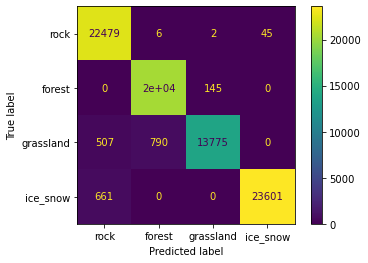

In [110]:
labels = ["rock","forest","grassland","ice_snow"]
plot_confusion_matrix(rf, X_test, y_test,display_labels=labels)

In [117]:
#overall accuracy

oa = cnf_mat.diagonal().sum()/cnf_mat.sum()
oa

0.9738505015221531

In [118]:
#userers accuracy
ua = cnf_mat.diagonal()/cnf_mat.sum(axis=0)
ua

array([0.95060684, 0.96251295, 0.98944117, 0.99809693])

In [120]:
#producers accuracy

pa = cnf_mat.diagonal()/cnf_mat.sum(axis=1)
pa

array([0.99764779, 0.99295535, 0.91394639, 0.97275575])

In [123]:
from sklearn.model_selection import StratifiedKFold

In [127]:
skf = StratifiedKFold(n_splits = 5, random_state = 12, shuffle = True)

In [135]:

oaList = []
for train_index, test_index in skf.split(gt["class_id"],gt["class_id"]):
    print(train_index,test_index)
    
    #subset ground truth
    polygon_train = gt.iloc[idx_train,:]
    polygon_train = gt.iloc[idx_test,:]
    
    #rasterize polygons
    shapes_test = ((geom,value) for geom, value in  zip(polygon_test.geometry, polygon_test.class_id))
    label_test = features.rasterize(shapes = shapes_test, 
                  out_shape = (template["height"],template["width"]), 
                   transform = template["transform"],
                   fill = -1,
                   all_touched = False,
                   dtype = np.float32)
    
    shapes_train = ((geom,value) for geom, value in  zip(polygon_train.geometry, polygon_train.class_id))
    label_train = features.rasterize(shapes = shapes_train, 
                  out_shape = (template["height"],template["width"]), 
                   transform = template["transform"],
                   fill = -1,
                   all_touched = False,
                   dtype = np.float32)
    
    #extract data from sentinel-2 bands
    
    X_train = bands[label_train>=0,:]
    y_train = label_train[label_train>=0]
    
    X_test = bands[label_test>=0,:]
    y_test = label_train[label_test>=0]
    
    #train model
    
    rf.fit(X_train,y_train)
    
    #predict model on entire dataset
    #.......
    

    #aply model on test dataset
    y_pred_test = rf.predict(X_test)
        
    #evaluate model
    #cofusion matrix
    conf_mat = confusion_matrix(y_test,y_pred_test)
    
    #erreor metric
    overall_acc = conf_mat.diagonal().sum()/conf_mat.sum()
    
    oaList.append(overall_acc)
    
    

[  0   1   3   4   5   6   7   8  10  11  12  13  14  15  16  18  19  20
  21  22  23  24  25  26  28  30  31  32  33  34  36  37  38  39  40  42
  43  44  48  49  50  51  52  53  54  55  56  57  58  59  60  61  63  64
  65  67  68  69  70  73  74  76  78  79  80  81  82  84  85  86  87  88
  89  90  91  92  94  95  96  97  98 100 101 102 104 105 107 109 111 112
 113 115 116 117 119 122 123 125 126 127 128 129 130 132 133 135 136 137
 138 139 140 141 142 143 144 145 146] [  2   9  17  27  29  35  41  45  46  47  62  66  71  72  75  77  83  93
  99 103 106 108 110 114 118 120 121 124 131 134]


C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[  0   1   2   3   4   5   6   7   9  11  12  14  16  17  18  19  20  22
  23  24  25  26  27  28  29  30  31  33  34  35  37  38  39  41  42  44
  45  46  47  48  51  52  53  55  56  57  58  59  61  62  64  65  66  67
  68  69  70  71  72  74  75  77  78  79  80  81  82  83  86  87  90  91
  92  93  94  95  96  98  99 100 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 126 127 128 130 131
 132 133 134 136 138 139 140 142 145] [  8  10  13  15  21  32  36  40  43  49  50  54  60  63  73  76  84  85
  88  89  97 101 125 129 135 137 141 143 144 146]


C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[  1   2   3   4   7   8   9  10  11  12  13  14  15  17  18  19  21  23
  24  25  27  28  29  30  31  32  33  34  35  36  37  38  40  41  43  44
  45  46  47  49  50  52  54  55  58  59  60  62  63  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  80  81  82  83  84  85  87  88  89
  91  92  93  95  96  97  98  99 101 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 120 121 122 124 125 126 129 131 132 134 135
 136 137 138 139 140 141 143 144 145 146] [  0   5   6  16  20  22  26  39  42  48  51  53  56  57  61  64  79  86
  90  94 100 102 119 123 127 128 130 133 142]


C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[  0   1   2   3   5   6   7   8   9  10  13  15  16  17  19  20  21  22
  23  26  27  29  30  32  33  34  35  36  37  39  40  41  42  43  44  45
  46  47  48  49  50  51  53  54  55  56  57  58  60  61  62  63  64  65
  66  68  71  72  73  75  76  77  78  79  80  82  83  84  85  86  88  89
  90  91  93  94  95  97  98  99 100 101 102 103 104 106 108 109 110 111
 114 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 133
 134 135 137 139 141 142 143 144 145 146] [  4  11  12  14  18  24  25  28  31  38  52  59  67  69  70  74  81  87
  92  96 105 107 112 113 115 132 136 138 140]


C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


[  0   2   4   5   6   8   9  10  11  12  13  14  15  16  17  18  20  21
  22  24  25  26  27  28  29  31  32  35  36  38  39  40  41  42  43  45
  46  47  48  49  50  51  52  53  54  56  57  59  60  61  62  63  64  66
  67  69  70  71  72  73  74  75  76  77  79  81  83  84  85  86  87  88
  89  90  92  93  94  96  97  99 100 101 102 103 105 106 107 108 110 112
 113 114 115 118 119 120 121 123 124 125 127 128 129 130 131 132 133 134
 135 136 137 138 140 141 142 143 144 146] [  1   3   7  19  23  30  33  34  37  44  55  58  65  68  78  80  82  91
  95  98 104 109 111 116 117 122 126 139 145]


C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\ronny\.conda\envs\rs\lib\site-packages\sklearn\ensemble\_forest.py:546: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [136]:
oaList

[0.9999757425802618,
 0.9999757425802618,
 0.9999757425802618,
 0.9999757425802618,
 0.9999757425802618]